In [50]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch
import math

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # CUDA device configuration

# -----Model Hyperparameters Initialisation-----
num_epochs = 1000 # No. of epochs
input_dim = 1; output_dim = 1 # Input & Output dimensions
n_per_layer = ([500, 500, 500]) # Neurons per layer
learning_rate = 0.0001 # Learning rate of optimiser
training_data = 13

# Setting the synthetic data set
def F(y):
    return np.sin(8 * np.pi * y)

# Model's training and testing data sets
X_train = torch.linspace(0, 1, training_data)[:,None] 
Y_train = F(X_train)


# -----Model Structure Initialisation with 2 Hidden Layers-----
class Network(torch.nn.Module): 
  def __init__(self, n_per_layer, input_dim, output_dim): # Layer setup
    super().__init__()
    self.fc1 = nn.Linear(input_dim, n_per_layer[0])  # Input Layer
    self.fc2 = nn.Linear(n_per_layer[0], n_per_layer[1]) # Hidden Layer 1
    self.fc3 = nn.Linear(n_per_layer[1], n_per_layer[2]) # Hidden Layer 2
    self.fc4 = nn.Linear(n_per_layer[2], output_dim) # Output Layer

  def forward(self, x): # Activation function after each layer (ReLu)
    x = torch.relu(self.fc1(x)) 
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = Network(n_per_layer, input_dim, output_dim) # Calling Python class as to use the model when needed

In [52]:
# -----Setting Loss Function and Optimiser-----
criterion = torch.nn.MSELoss() # Loss Criterion (Mean Squared Error)
optimiser = torch.optim.Adam(model.parameters(), lr=0.005)

# -----Training Loop (A single Forward and Backward pass per epoch)-----
losses = []; val_losses = []; prev_loss = []; loss = torch.zeros(1)

for epoch in range(num_epochs): # Sets a loop for each epoch
    prev_loss = loss.item()
    y_pred = model(X_train) # Initiates forward pass
    loss = criterion(y_pred, Y_train) # Computes loss from the prediction
    losses.append(loss.item())
    optimiser.zero_grad() # Rests gradiets per epoch
    loss.backward() # Calculates gradients of loss with backpropagation
    optimiser.step() # Updates model parameters using gradients 

 Number of Epochs needed (out of 1000): 1000
 Training Loss of Model: 0.0020577365066856146


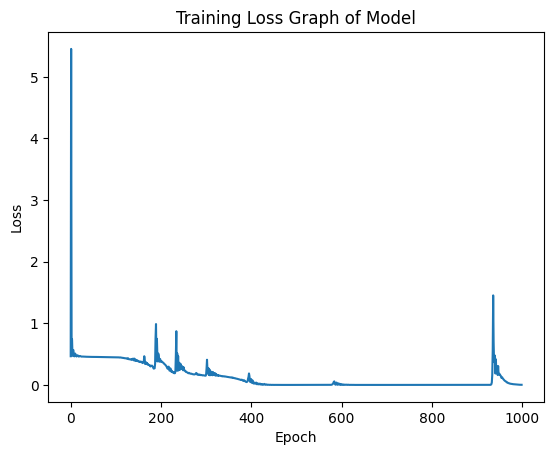

In [53]:
print(f" Number of Epochs needed (out of {num_epochs}): {len(losses)}")
print(f" Training Loss of Model: {loss}")
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Graph of Model')
plt.show()

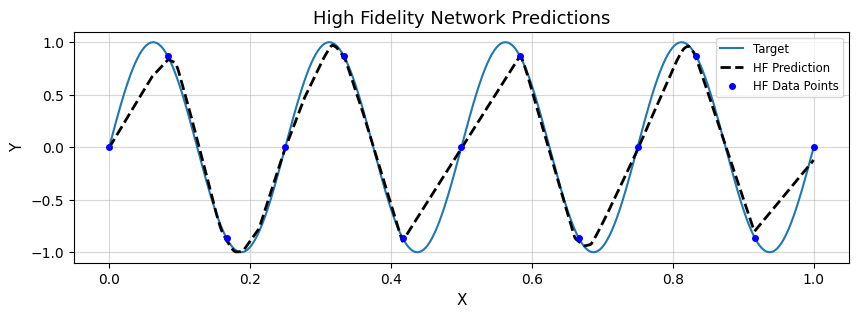

In [56]:
# -----Prediction and plotting stage-----
new_X_input = torch.linspace(0, 1, 1000)[:,None] # Random ranged data array for new X_input data

with torch.no_grad():
    y_pred_new = model(new_X_input) # Define the NEW input data

# Define the NEW input datax
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(new_X_input, F(new_X_input), label= "Target ")
ax.plot(new_X_input.cpu().detach().numpy(), y_pred_new.cpu().detach().numpy(),'--k', lw=2, label= "HF Prediction ")
ax.plot(X_train.cpu().detach().numpy(), Y_train.cpu().detach().numpy(), 'bo', markersize = 4, label = 'HF Data Points')
ax.grid(which='both', alpha=0.5); ax.set_xlabel('X', fontsize=11); ax.set_ylabel('Y', fontsize=11); plt.legend(loc='upper right', ncol=1, fontsize='small')
ax.set_title('High Fidelity Network Predictions', fontsize=13); plt.show()